Take the virus story.
This provides some data: `DDADDAADD`
Simplify the problem so there are only two types of virus in the world
A bad virus like Ebola that kills half of the people it infects
A 'good' virus that kills one in six people
Question: which virus is this?


You need a story to connect the qualities of the virus to the data.
The biology is complicated but we will summarise this by saying that the summation of all your personal genetics, your current health, and the virulence of that particular instance of the virus comes down to a dice roll. The 'good' virus implies that you only die if you roll `1`, but the 'bad' virus means that you die if you roll `1`, `2`, or `3`.
This dice story is obviously _not_ true: that is not how nature works. It's a 'model' that conveniently allows us to connect the observed data to the quantity of interest.
We wish to know whether you're rolling the 'good' or the 'bad' dice.


1. Garden of forking paths: good dice
2. Garden of forking paths: bad dice

Let's just take the first 3 observations `DDA`

then there's $\frac{1}{6}\times\frac{1}{6}\times\frac{5}{6} = \frac{5}{216}$ chances the 'good' dice, and $\frac{3}{6}\times\frac{3}{6}\times\frac{3}{6}=\frac{27}{216}$ chances the 'bad' dice can produce that sequence.

Now that's leaping directly to probabilities, but we could have just started with counting which would give us the same conclusion $1 \times 1 \times 5=5$ versus $3 \times 3 \times 3 = 27$

You're the CMO. Should you be advising the Prime minister to enter lockdown after these first 3 observations. It's clearly _more_ likely this is a nasty virus but it's not certain. If you want to lean on the magical p-value in your future defence at the COVID or _not_-COVID inquiry then you can only pull the alarm cord when the 'good' virus probabilty is less than 5%. There are only two possible viruses in our simple world, and we have enumerated 5 ways that this good by the 'good' virus out of a total of $5+27$ ways. In our _model_, there are no other possibilities ... although the real world might not be that simple. For example, perhaps both viruses co-exist and some people have been infected by one, and others by another. We're (deliberately) ignoring that. But that simplification does tell us that the chance of this being a nasty is $\frac{27}{32}$ which is around 84%. So we don't pull the alarm cord.

Another person dies.

If this is the 'bad' virus then there are three ways that could arise or $27 \times 3 = 81$.
If this is the 'good' virus then there is only one way that could arise or $5 \times 1 = 5$.

We need to recalculate our total number of ways which is now $5+81=86$, and the chance of this being a nasty is now $\frac{81}{86}$ or 94.2% so we do nothing and wait again.

Another person dies.

If this is the 'bad' virus then there are three ways that could arise or $81 \times 3 = 241$.
If this is the 'good' virus then there is only one way that could arise or $5 \times 1 = 5$.

We need to recalculate our total number of ways which is now $5+241=246$ and the chance of this neing a nasty is now $\frac{241}{246}$ or 98%. So we call the Prime minister, only to discover he's busy planning his honeymoon in the Caribbean. 

Ah, well. It probably won't that bad.

Now Dominic comes along. Although he did history but he also thinks he's clever, and tells you that your model is stupid. That there are many more types of virus out there than just 'good' and 'bad'. Dom likes Dungeons and Dragons, and hands you a twenty-sided dice (D20) to use instead of your simple 6-sided dice. He says there are 21 possibilities. The virus is benign and it doesn't matter what roll you get you always survive, or the virus means certain death where it doesn't matter what roll you get, you will die.

You don't fancy doing all the maths by hand again for each of the 21 different levels of virus severity.

In [2]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt


In [3]:
data = "DDA"
hypotheses = np.linspace(0,20,num=21)


The little code snippet below is your model.
It connects the data to the dice.
And counts the number of ways a data item can arise given the different hypothesised lethality values of your dice

In [4]:
ways = []
for hypothesis in hypotheses:
    this_virus = []
    for datum in data:
        this_virus.append(hypothesis) if datum == "D" else this_virus.append(20-hypothesis)
    ways.append(this_virus)
ways = np.array(ways)

In [5]:
ways

array([[ 0.,  0., 20.],
       [ 1.,  1., 19.],
       [ 2.,  2., 18.],
       [ 3.,  3., 17.],
       [ 4.,  4., 16.],
       [ 5.,  5., 15.],
       [ 6.,  6., 14.],
       [ 7.,  7., 13.],
       [ 8.,  8., 12.],
       [ 9.,  9., 11.],
       [10., 10., 10.],
       [11., 11.,  9.],
       [12., 12.,  8.],
       [13., 13.,  7.],
       [14., 14.,  6.],
       [15., 15.,  5.],
       [16., 16.,  4.],
       [17., 17.,  3.],
       [18., 18.,  2.],
       [19., 19.,  1.],
       [20., 20.,  0.]])

In [6]:
ways.cumprod(axis=1)

array([[0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.900e+01],
       [2.000e+00, 4.000e+00, 7.200e+01],
       [3.000e+00, 9.000e+00, 1.530e+02],
       [4.000e+00, 1.600e+01, 2.560e+02],
       [5.000e+00, 2.500e+01, 3.750e+02],
       [6.000e+00, 3.600e+01, 5.040e+02],
       [7.000e+00, 4.900e+01, 6.370e+02],
       [8.000e+00, 6.400e+01, 7.680e+02],
       [9.000e+00, 8.100e+01, 8.910e+02],
       [1.000e+01, 1.000e+02, 1.000e+03],
       [1.100e+01, 1.210e+02, 1.089e+03],
       [1.200e+01, 1.440e+02, 1.152e+03],
       [1.300e+01, 1.690e+02, 1.183e+03],
       [1.400e+01, 1.960e+02, 1.176e+03],
       [1.500e+01, 2.250e+02, 1.125e+03],
       [1.600e+01, 2.560e+02, 1.024e+03],
       [1.700e+01, 2.890e+02, 8.670e+02],
       [1.800e+01, 3.240e+02, 6.480e+02],
       [1.900e+01, 3.610e+02, 3.610e+02],
       [2.000e+01, 4.000e+02, 0.000e+00]])

Text(0.5, 0, 'Dice lethality aka number of faces that end in death')

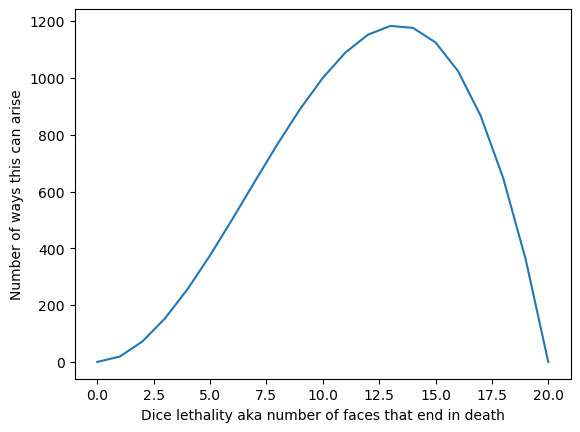

In [8]:
# Now plot
ways_cumprod = ways.cumprod(axis=1)[:,-1]
fig, ax = plt.subplots()
ax.plot(hypotheses, ways_cumprod)
plt.ylabel("Number of ways this can arise")
plt.xlabel("Dice lethality aka number of faces that end in death")
